# K-MEANS CLUSTERING

## Introduction to Clustering

Often, the data you encounter in the real world won’t have flags attached and won’t provide labeled answers to your question. Finding patterns in this type of data, unlabeled data, is a common theme in many machine learning applications. Unsupervised Learning is how we find patterns and structure in these data.

Clustering is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters. Examples of clustering applications are:

* Recommendation engines: group products to personalize the user experience

* Search engines: group news topics and search results

* Market segmentation: group customers based on geography, demography, and behaviors

* Image segmentation: medical imaging or road scene segmentation on self-driving cars



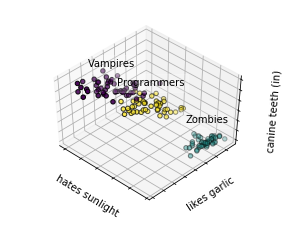

In [34]:
#import codecademylib3_seaborn
import matplotlib.pyplot as plt
import numpy as np 

from os.path import join, dirname, abspath
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

fignum = 1

# Plot the ground truthd

fig = plt.figure(fignum, figsize=(4, 3))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Zombies', 0),
                    ('Programmers', 1),
                    ('Vampires', 2)]:
    ax.text3D(x[y == label, 3].mean(),
              x[y == label, 0].mean(),
              x[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('hates sunlight')
ax.set_ylabel('likes garlic')
ax.set_zlabel('canine teeth (in)')

ax.set_title('')
ax.dist = 12

# Add code here:

plt.show()



# K-Means Clustering

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:

How many groups do we choose?
How do we define similarity?
K-Means is the most popular and well-known clustering algorithm, and it tries to address these two questions.

The “K” refers to the number of clusters (groups) we expect to find in a dataset.
The “Means” refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.
It is an iterative approach:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence (when points don’t move between clusters and centroids stabilize).

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster.

<img src="images/WL1tIZ4.gif" width=600 height=300 />

# Iris Dataset

Before we implement the K-means algorithm, let’s find a dataset. The sklearn package embeds some datasets and sample images. One of them is the Iris dataset.

The Iris dataset consists of measurements of sepals and petals of 3 different plant species:

    Iris setosa
    Iris versicolor
    Iris virginica
    
<img src="images/iris.svg" width=600 height=300 />
    
The sepal is the part that encases and protects the flower when it is in the bud stage. A petal is a leaflike part that is often colorful.

From sklearn library, import the datasets module:

    from sklearn import datasets
    # To load the Iris dataset:

    iris = datasets.load_iris()
    # The Iris dataset looks like:

    [[ 5.1  3.5  1.4  0.2 ]
     [ 4.9  3.   1.4  0.2 ]
     [ 4.7  3.2  1.3  0.2 ]
     [ 4.6  3.1  1.5  0.2 ]
       . . .
     [ 5.9  3.   5.1  1.8 ]]

 
We call each piece of data a sample. For example, each flower is one sample.

Each characteristic we are interested in is a feature. For example, petal length is a feature of this dataset.

The features of the dataset are:

    Column 0: Sepal length
    Column 1: Sepal width
    Column 2: Petal length
    Column 3: Petal width
    
The 3 species of Iris plants are what we are going to cluster later in this lesson.

In [35]:

import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

# print(iris.data)

# print(iris.target)

print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Visualize Before K-Means

To get a better sense of the data in the iris.data matrix, let’s visualize it!

With Matplotlib, we can create a 2D scatter plot of the Iris dataset using two of its features (sepal length vs. petal length). The sepal length measurements are stored in column 0 of the matrix, and the petal length measurements are stored in column 2 of the matrix.

But how do we get these values?

Suppose we only want to retrieve the values that are in column 0 of a matrix, we can use the NumPy/pandas notation [:,0] like so:

    matrix[:,0]
[:,0] can be translated to [all_rows , column_0]

Once you have the measurements we need, we can make a scatter plot like this:

    plt.scatter(x, y)
To show the plot:

    plt.show()
Let’s try this! But this time, plot the sepal length (column 0) vs. sepal width (column 1) instead.

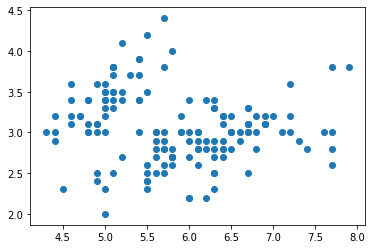

In [36]:

import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

# Store iris.data

samples = iris.data

# Create x and y
x = samples[:,0]
y = samples[:,1]
# Plot x and y
plt.scatter(x,y)
# Show the plot
plt.show()

# Implementing K-Means: Step 1
The K-Means algorithm:

    Place k random centroids for the initial clusters.
    
    Assign data samples to the nearest centroid.
    
    Update centroids based on the above-assigned data samples.
    
    Repeat Steps 2 and 3 until convergence.

After looking at the scatter plot and having a better understanding of the Iris data, let’s start implementing the K-Means algorithm.

In this exercise, we will implement Step 1.

Because we expect there to be three clusters (for the three species of flowers), let’s implement K-Means where the k is 3.

Using the NumPy library, we will create three random initial centroids and plot them along with our samples.

# Question

1.
First, create a variable named k and set it to 3.



2.
Then, use NumPy’s random.uniform() function to generate random values in two lists:

a centroids_x list that will have k random values between min(x) and max(x)
a centroids_y list that will have k random values between min(y) and max(y)
The random.uniform() function looks like:

np.random.uniform(low, high, size)
The centroids_x will have the x-values for our initial random centroids and the centroids_y will have the y-values for our initial random centroids.


3.
Create an array named centroids and use the zip() function to add centroids_x and centroids_y to it.

The zip() function looks like:

np.array(list(zip(array1, array2)))
Then, print centroids.

The centroids list should now have all the initial centroids.



4.
Make a scatter plot of y vs x.

Make a scatter plot of centroids_y vs centroids_x.

Show the plots to see your centroids!





Adding alpha=0.5 makes the points look darker than others. This is because some of the points might have the exact the same values. The dots are darker because they are stacked!

[[7.1544691  2.26923505]
 [5.54071045 3.98855857]
 [6.34606222 3.38255148]]


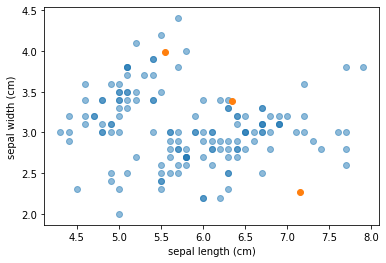

In [37]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

# Number of clusters
k = 3

# Create x coordinates of k random centroids

centroids_x = np.random.uniform(min(x), max(x), size=k)
#print(centroids_x)
# Create y coordinates of k random centroids

centroids_y = np.random.uniform(min(y), max(y), size=k)

# Create centroids array

centroids = np.array(list(zip(centroids_x,centroids_y)))
print(centroids)
# Make a scatter plot of x, y
plt.scatter(x, y,alpha=0.5)
# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

# Display plot
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


# Implementing K-Means: Step 2

The K-Means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence.

In this exercise, we will implement Step 2.

Now we have the three random centroids. Let’s assign data points to their nearest centroids.

To do this we’re going to use a Distance Formula to write a distance() function. Then, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids.

Suppose we have a point and a list of three distances in distances and it looks like [15, 20, 5], then we would want to assign the data point to the 3rd centroid. The argmin(distances) would return the index of the lowest corresponding distance, 2, because the index 2 contains the minimum value.

# Question

1.
Write a distance() function.

It should be able to take in a and b and return the distance between the two points.



2.
Create an array called labels that will hold the cluster labels for each data point. Its size should be the length of the data sample.

It should look something like:

    [ 0.  0.  0.  0.  0.  0.  ...  0.]
Create an array called distances that will hold the distances for each centroid. It should have the size of k.

It should look something like:

    [ 0.  0.  0.]


3.
To assign each data point to the closest centroid, we need to iterate through the whole data sample and calculate each data point’s distance to each centroid.

We can get the index of the smallest distance of distances by doing:

    cluster = np.argmin(distances)
Then, assign the cluster to each index of the labels array.



4.
Then, print labels (outside of the for loop).

Awesome! You have just finished Step 2 of the K-means algorithm.

In [38]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

# Distance formula

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# print(labels)

# Distances to each centroid

distances = np.zeros(k)


# # Assign to the closest centroid

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# # Print labels

print(labels)

[0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 1. 2. 2. 2. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 0. 0. 2. 1. 2. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 2. 2. 0. 0. 1. 1. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 2. 0. 2. 0. 2. 2. 1. 2. 0. 2. 2. 0. 2. 0. 0. 2. 2. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2.
 2. 2. 0. 2. 2. 0.]


# Implementing K-Means: Step 3

The K-Means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.
Repeat Steps 2 and 3 until convergence.

In this exercise, we will implement Step 3.

Find new cluster centers by taking the average of the assigned points. To find the average of the assigned points, we can use the .mean() function.

# Question
1.
Save the old centroids value before updating.

We have already imported deepcopy for you:

from copy import deepcopy
Store centroids into centroids_old using deepcopy():

centroids_old = deepcopy(centroids)


2.
Then, create a for loop that iterates k times.

Since k = 3, as we are iterating through the forloop each time, we can calculate the mean of the points that have the same cluster label.

Inside the for loop, create an array named points where we get all the data points that have the cluster label i.

There are two ways to do this, check the hints to see both!

Hint
One way to do this is:

    for i in range(k):
      points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    Another way is to use nested for loop:

    for i in range(k):
      points = []
      for j in range(len(sepal_length_width)):
        if labels[j] == i:
          points.append(sepal_length_width[j])
          
Here, we create an empty list named points first, and use .append() to add values into the list.

3.
Then (still inside the for loop), calculate the mean of those points using .mean() to get the new centroid.

Store the new centroid in centroids[i].

The .mean() fucntion looks like:

np.mean(input, axis=0)


4.
Oustide of the for loop, print centroids_old and centroids to see how centroids changed.

In [39]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data
samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# Distances to each centroid
distances = np.zeros(k)

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# Step 3: Update centroids

centroids_old = deepcopy(centroids)


  
for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]

    centroids[i]= np.mean(points, axis=0)

  # points=[]
  # for i in range(k):
  # points = []
  # for j in range(len(sepal_length_width)):
  #   if labels[j] == i:
  #     points.append(sepal_length_width[j])

print(centroids_old)
print('')
print(centroids)


[[5.08902705 4.39580964]
 [5.19906893 3.93929583]
 [5.6824882  4.20634193]]

[[       nan        nan]
 [5.32197802 3.01318681]
 [6.64745763 3.12542373]]


C:\Users\naim_\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\naim_\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Implementing K-Means: Step 4

The K-Means algorithm:

    1 Place k random centroids for the initial clusters.

    2 Assign data samples to the nearest centroid.

    3 Update centroids based on the above-assigned data samples.

    4 Repeat Steps 2 and 3 until convergence.

In this exercise, we will implement Step 4.

This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the while loop, we need to create an array named errors. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in errors are 0.

# Question

1.
On line 40 of script.py, initialize error:

    error = np.zeros(3)
Then, use the distance() function to calculate the distance between the updated centroid and the old centroid and put them in error:

    error[0] = distance(centroids[0], centroids_old[0])
    # do the same for error[1]
    # do the same for error[2]


2.
After that, add a while loop:

    while error.all() != 0:
And move everything below (from Step 2 and 3) inside.

And recalculate error again at the end of each iteration of the while loop:

    error[0] = distance(centroids[0], centroids_old[0])
    # do the same for error[1]
    # do the same for error[2]

    Hint
    while error.all() != 0:

      # Step 2: Assign samples to nearest centroid

      for i in range(len(samples)):
        distances[0] = distance(sepal_length_width[i], centroids[0])
        distances[1] = distance(sepal_length_width[i], centroids[1])
        distances[2] = distance(sepal_length_width[i], centroids[2])
        cluster = np.argmin(distances)
        labels[i] = cluster

      # Step 3: Update centroids

      centroids_old = deepcopy(centroids)

      for i in range(3):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)

      # Add this again:

      error[0] = distance(centroids[0], centroids_old[0])
      error[1] = distance(centroids[1], centroids_old[1])
      error[2] = distance(centroids[2], centroids_old[2])
      
3.
Awesome, now you have everything, let’s visualize it.

After the while loop finishes, let’s create an array of colors:

    colors = ['r', 'g', 'b']
Then, create a for loop that iterates k times.

Inside the for loop (similar to what we did in the last exercise), create an array named points where we get all the data points that have the cluster label i.

Then we are going to make a scatter plot of points[:, 0] vs points[:, 1] using the scatter() function:

    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)


4.
Then, paste the following code at the very end. Here, we are visualizing all the points in each of the labels a different color.

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')

    plt.show()

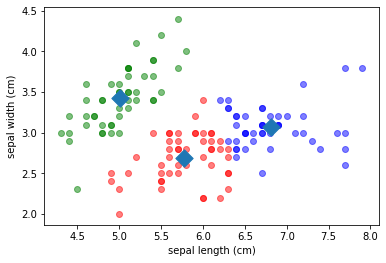

In [40]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

# for i in range(k):
#   error[i] = distance(centroids[i], centroids_old[i])

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1],   centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


# Implementing K-Means: Scikit-Learn

Awesome, you have implemented K-Means clustering from scratch!

Writing an algorithm whenever you need it can be very time-consuming and you might make mistakes and typos along the way. We will now show you how to implement K-Means more efficiently – using the scikit-learn library.

Instead of implementing K-Means from scratch, the sklearn.cluster module has many methods that can do this for you.

To import KMeans from sklearn.cluster:

    from sklearn.cluster import KMeans
For Step 1, use the KMeans() method to build a model that finds k clusters. To specify the number of clusters (k), use the n_clusters keyword argument:

    model = KMeans(n_clusters = k)
For Steps 2 and 3, use the .fit() method to compute K-Means clustering:

    model.fit(X)
After K-Means, we can now predict the closest cluster each sample in X belongs to. Use the .predict() method to compute cluster centers and predict cluster index for each sample:

    model.predict(X)

# Question
1.
First, import KMeans from sklearn.cluster.



2.
Somewhere after samples = iris.data, use KMeans() to create an instance called model to find 3 clusters.

To specify the number of clusters, use the n_clusters keyword argument.



3.
Next, use the .fit() method of model to fit the model to the array of points samples.



4.
After you have the “fitted” model, determine the cluster labels of samples.

Then, print the labels.

In [41]:
import matplotlib.pyplot as plt
from sklearn import datasets

# From sklearn.cluster, import KMeans class
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

# Use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters = 3)
# Use .fit() to fit the model to samples
model.fit(samples)
# Use .predict() to determine the labels of samples 
labels=model.predict(samples)
# Print the labels
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


# New Data?
You used K-Means and found three clusters of the samples data. But it gets cooler!

Since you have created a model that computed K-Means clustering, you can now feed new data samples into it and obtain the cluster labels using the .predict() method.

So, suppose we went to the florist and bought 3 more Irises with the measurements:

    [[ 5.1  3.5  1.4  0.2 ]
     [ 3.4  3.1  1.6  0.3 ]
     [ 4.9  3.   1.4  0.2 ]]
We can feed this new data into the model and obtain the labels for them.

# Question

1.
First, store the 2D matrix:

    new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
       [6.5, 3. , 5.5, 0.4],
       [5.8, 2.7, 5.1, 1.9]])
To test if it worked, print the new_samples.


2.
Use the model to predict labels for the new_samples, and print the predictions.

The output might look like:

    [0 2 2]
Those are the predicted labels for our three new flowers. If you are seeing different labels, don’t worry! Since the cluster centroids are randomly initialized, running the model repeatedly can produce different clusters with the same input data.

In [42]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

# Store the new Iris measurements
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

# Predict labels for the new_samples
predict = model.predict(new_samples)
print(predict)

[0 1 1]


# Visualize After K-Means
We have done the following using sklearn library:

Load the embedded dataset
Compute K-Means on the dataset (where k is 3)
Predict the labels of the data samples
And the labels resulted in either 0, 1, or 2.

Let’s finish it by making a scatter plot of the data again!

This time, however, use the labels numbers as the colors.

To edit colors of the scatter plot, we can set c = labels:

    plt.scatter(x, y, c=labels, alpha=0.5)

    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')

# Question

1.
Create an array called x that contains the Column 0 of samples.

Create an array called y that contains the Column 1 of samples.



2.
Make a scatter plot of x and y, using labels to define the colors.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


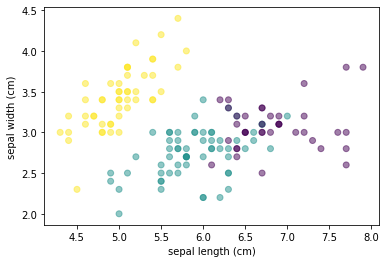

In [43]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)

print(labels)

# Make a scatter plot of x and y and using labels to define the colors
x =samples[:,0]
y = samples[:,1]
plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.show()



# Evaluation

At this point, we have clustered the Iris data into 3 different groups (implemented using Python and using scikit-learn). But do the clusters correspond to the actual species? Let’s find out!

First, remember that the Iris dataset comes with target values:

    target = iris.target
It looks like:

    [ 0 0 0 0 0 ... 2 2 2]
According to the metadata:

All the 0‘s are Iris-setosa
All the 1‘s are Iris-versicolor
All the 2‘s are Iris-virginica
Let’s change these values into the corresponding species using the following code:

    species = np.chararray(target.shape, itemsize=150)

    for i in range(len(samples)):
      if target[i] == 0:
        species[i] = 'setosa'
      elif target[i] == 1:
        species[i] = 'versicolor'
      elif target[i] == 2: 
        species[i] = 'virginica'
        
Then we are going to use the Pandas library to perform a cross-tabulation.

Cross-tabulations enable you to examine relationships within the data that might not be readily apparent when analyzing total survey responses.

The result should look something like:

    labels    setosa    versicolor    virginica
    0             50             0            0
    1              0             2           36
    2              0            48           14
(You might need to expand this narrative panel in order to the read the table better.)

The first column has the cluster labels. The second to fourth columns have the Iris species that are clustered into each of the labels.

By looking at this, you can conclude that:

    Iris-setosa was clustered with 100% accuracy.
    Iris-versicolor was clustered with 96% accuracy.
    Iris-virginica didn’t do so well.
    
Follow the instructions below to learn how to do a cross-tabulation.



# Instruction
1.
pandas is already imported for you:

import pandas as pd
Add the code from the narrative to get the species array and finish the elif statements:

    species = np.chararray(target.shape, itemsize=150)

    for i in range(len(samples)):
      if target[i] == 0:
        species[i] = 'setosa'
      # finish elif
      # finish elif


2.
Then, below the for loop, create:

    df = pd.DataFrame({'labels': labels, 'species': species})

    print(df)


3.
Next, use the the crosstab() method to perform cross-tabulation:

    ct = pd.crosstab(df['labels'], df['species'])
    print(ct)
Expand the right panel (output terminal).

How accurate are the clusters?

In [44]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

iris = datasets.load_iris()

samples = iris.data

target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)

# Code starts here:
species = np.chararray(target.shape, itemsize=150)

for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'veriscolor'
  elif target[i] == 2:
    species[i] = 'virginica'
  
df = pd.DataFrame({'labels': labels, 'species': species})

# print(df)

ct = pd.crosstab(df['labels'], df['species'])
print(ct)
  


species  b'setosa'  b'veriscolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


# The Number of Clusters

At this point, we have grouped the Iris plants into 3 clusters. But suppose we didn’t know there are three species of Iris in the dataset, what is the best number of clusters? And how do we determine that?

Before we answer that, we need to define what is a good cluster?

Good clustering results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are is measured by inertia. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has done.

You can check the inertia of a model by:

print(model.inertia_)
For the Iris dataset, if we graph all the ks (number of clusters) with their inertias:

<img src="images/number-of-clusters.svg" width=600 height=300 />

Optimal Number of Clusters
Notice how the graph keeps decreasing.

Ultimately, this will always be a trade-off. The goal is to have low inertia and the least number of clusters.

One of the ways to interpret this graph is to use the elbow method: choose an “elbow” in the inertia plot - when inertia begins to decrease more slowly.

In the graph above, 3 is the optimal number of clusters.



# Instruction
1.
First, create two lists:

num_clusters that has values from 1, 2, 3, … 8
inertias that is empty


2.
Then, iterate through num_clusters and calculate K-means for each number of clusters.

Add each of their inertias into the inertias list.



    for k in num_clusters:
      model = KMeans(n_clusters=k)
      model.fit(samples)
      inertias.append(model.inertia_)
3.
Plot the inertias vs num_clusters:

    plt.plot(num_clusters, inertias, '-o')

    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')

    plt.show()


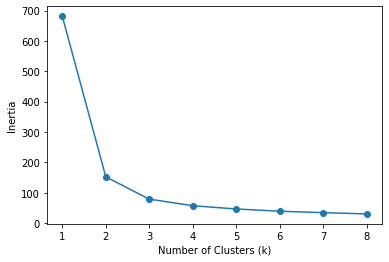

In [45]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

# Code Start here:
num_clusters = list(range(1, 9))
inertias = []
for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()
# print(model.inertia_)

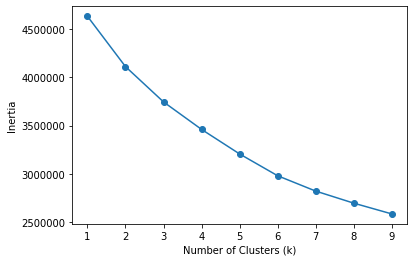

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes")

num_clusters = list(range(1,10))
inertias = []
for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(digits)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()